In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import random
import numpy as np

In [2]:
data = pd.read_csv("Life Expectancy Data.csv")
data = data.drop(["Status"], axis = 1) #almost 90% of columns have the same value so for the simlicity i decided to drop it
data.dropna(inplace=True)
data.head(10)

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
country_to_number = {c:i+1 for i,c in enumerate(data["Country"].unique())}  #nn cant process strings so we need to encode it to numbers
data['Country'] = [country_to_number[c] for c in data['Country']]
data['Country']

0         1
1         1
2         1
3         1
4         1
       ... 
2933    133
2934    133
2935    133
2936    133
2937    133
Name: Country, Length: 1649, dtype: int64

In [4]:
Y = data["Life expectancy "]
X = data.drop(["Life expectancy "], axis = 1)
X.shape
X = np.array(X)
Y = np.array(Y)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=44)  

In [7]:
X_test.shape

(330, 20)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#normalize lables
ymin, ymax = min(Y_train), max(Y_train)
Y_train = (Y_train - ymin)/(ymax-ymin)
Y_test = (Y_test - ymin)/(ymax-ymin)

In [10]:
import import_ipynb
import nn   #my nn library (very unoptimized)

In [11]:
import torch
print(torch.cuda.is_available())

True


In [12]:
x_train = torch.tensor(X_train)
x_test = torch.tensor(X_test)
y_train = torch.tensor(Y_train)
y_test = torch.tensor(Y_test)
y_train

tensor([0.5511, 0.4756, 0.4178,  ..., 0.5178, 0.6511, 0.5356],
       dtype=torch.float64)

In [13]:
batch_size = 256
training_iterations = 100
learning_rate = 0.001

In [14]:
layer_sizes = [3, 10, 10, 1]   #last layer has 1 neuron because output is singular number
input_size = X.shape[1]          #number of columns in our dataset 
network = nn.MLP(input_size, layer_sizes) #creating our NN 

Iteration: 0 MAE: 8918.284907455987
Iteration: 1 MAE: 4827.951285297268
Iteration: 2 MAE: 20915.796483472837
Iteration: 3 MAE: 163322391.16389695
Iteration: 4 MAE: 2.2674270904781674e+36
Iteration: 5 MAE: 4.137308934465001e+233
Iteration: 6 MAE: nan
Iteration: 7 MAE: nan
Iteration: 8 MAE: nan
Iteration: 9 MAE: nan
Iteration: 10 MAE: nan
Iteration: 11 MAE: nan
Iteration: 12 MAE: nan
Iteration: 13 MAE: nan
Iteration: 14 MAE: nan
Iteration: 15 MAE: nan
Iteration: 16 MAE: nan
Iteration: 17 MAE: nan
Iteration: 18 MAE: nan
Iteration: 19 MAE: nan
Iteration: 20 MAE: nan
Iteration: 21 MAE: nan
Iteration: 22 MAE: nan
Iteration: 23 MAE: nan
Iteration: 24 MAE: nan
Iteration: 25 MAE: nan
Iteration: 26 MAE: nan
Iteration: 27 MAE: nan
Iteration: 28 MAE: nan
Iteration: 29 MAE: nan
Iteration: 30 MAE: nan
Iteration: 31 MAE: nan
Iteration: 32 MAE: nan
Iteration: 33 MAE: nan
Iteration: 34 MAE: nan
Iteration: 35 MAE: nan
Iteration: 36 MAE: nan
Iteration: 37 MAE: nan
Iteration: 38 MAE: nan
Iteration: 39 MAE

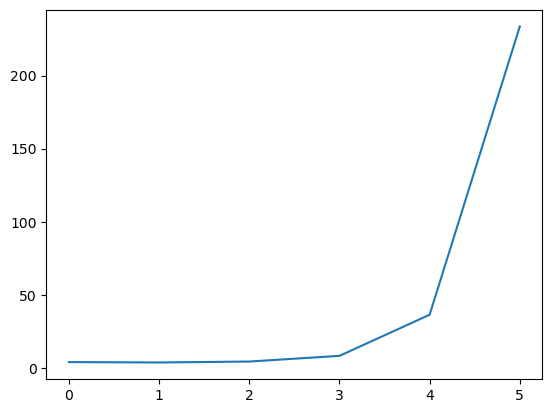

In [15]:
losses = []
for i in range(training_iterations):
    #we need to process one bach each iteration and adjust our parameters based on its gradient
    #this has to be done in loop because nn library isnt made to be doing matrix multiplication
    indices = np.random.choice(range(X_train.shape[0]), batch_size)
    batch = X_train[indices]
    y_preds = [network(x) for x in batch]

    #loss function - mean squared error function
    loss = sum((yp - yt)**2 for yp, yt in zip(y_preds, Y_train[indices]))
    loss = loss / batch_size
    losses.append(np.log10(loss.value))
    print(f'Iteration: {i} MAE: {loss.value}')
       
    #we need to reset gradients from previous batch
    network.zero_grad()

    #backpropagation to get gradient
    loss.backward()

    #move in opposite direction of gradient to minimize loss
    for p in network.parameters():
        p.value += -learning_rate * p.grad


   # print(after == before)
plt.plot(range(training_iterations), losses)

In [16]:
#builing same layers in torch to test it
#g = torch.Generator().manual_seed(442)
w1 = torch.randn((X_train.shape[1], 3), dtype=torch.float64)
b1 = torch.randn(3, dtype=torch.float64)
w2 = torch.randn((3, 10), dtype=torch.float64)
b2 = torch.randn(10, dtype=torch.float64)
w3 = torch.randn((10,10), dtype=torch.float64)
b3 = torch.randn(10, dtype=torch.float64)
w4 = torch.randn((10, 1), dtype=torch.float64)
b4 = torch.randn(1, dtype=torch.float64)

params = [w1,b1,w2,b2,w3,b3,w4,b4]
for p in params:
    p.requires_grad=True

In [17]:
loss = torch.nn.MSELoss()
mae = torch.nn.L1Loss()
act = torch.nn.ReLU()

C:\Users\geass\miniconda3\envs\CUDA\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Iteration: 0 MAE: 470.48183329905845
Iteration: 1 MAE: 21.025593969112144
Iteration: 2 MAE: 5.594586413064303
Iteration: 3 MAE: 2.8189528881620944
Iteration: 4 MAE: 2.199876398719203
Iteration: 5 MAE: 2.3856150629292108
Iteration: 6 MAE: 1.983808141343165
Iteration: 7 MAE: 1.9615850610439152
Iteration: 8 MAE: 1.5729029632946303
Iteration: 9 MAE: 1.8045364354208226
Iteration: 10 MAE: 1.9636877806328958
Iteration: 11 MAE: 1.9405332687978443
Iteration: 12 MAE: 1.5281344193622588
Iteration: 13 MAE: 1.5464983788125577
Iteration: 14 MAE: 1.7200150081444927
Iteration: 15 MAE: 1.232300146457166
Iteration: 16 MAE: 1.6390477915634218
Iteration: 17 MAE: 1.5332245562844908
Iteration: 18 MAE: 1.540564738603979
Iteration: 19 MAE: 1.2826861637424716
Iteration: 20 MAE: 1.3425920002288017
Iteration: 21 MAE: 1.3035132676492087
Iteration: 22 MAE: 1.3123549505521506
Iteration: 23 MAE: 1.2926776998992642
Iteration: 24 MAE: 1.090185477837772
Iteration: 25 MAE: 1.3297299511702432
Iteration: 26 MAE: 1.0226351

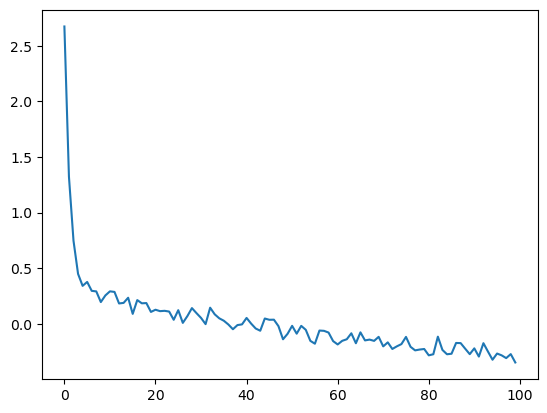

In [18]:
#running input trough all layers in batches
losses = []
loss = torch.nn.MSELoss()
mae = torch.nn.L1Loss()
act = torch.nn.ReLU()
for i in range(training_iterations):
    indices = torch.randint(0, X_train.shape[0], (batch_size,))
    batch = x_train[indices]
    
    layer1_out = act(batch @ w1 + b1)
    layer2_out = act(layer1_out @ w2 + b2)
    layer3_out = act(layer2_out @ w3 + b3)
    ypreds = layer3_out @ w4 + b4

    yps = ypreds.detach()
    yts = y_train[indices].view(batch_size,1).detach()
    
    out = mae(ypreds, y_train[indices])
    out2 = sum(((yp - yt)**2)/batch_size for yp, yt in zip(ypreds, y_train[indices]))
    print(f'Iteration: {i} MAE: {out2.item()}')
    losses.append(np.log10(out2.item()))

    for p in params:
        p.grad = None

    out2.backward()
    
    #update parameters
    for p in params:
        p.data += -1*learning_rate * p.grad

plt.plot(range(training_iterations), losses)